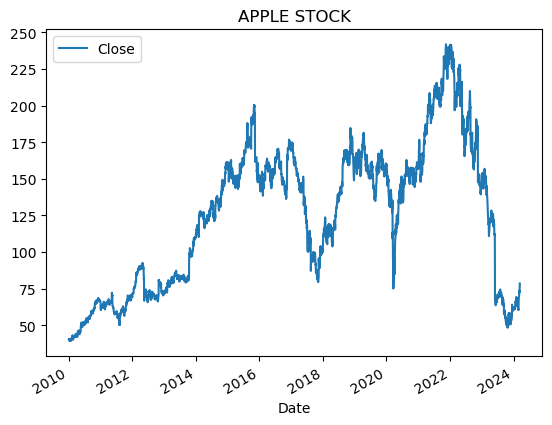

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date, time

# install yahoo finance libraries
try:
    import yfinance
except:
    ! pip install yfinance
    import yfinance
try:
    import yahoofinancials
except:
    ! pip install -q yahoofinancials
    import yahoofinancials
import yfinance as yf
from yahoofinancials import YahooFinancials

import warnings
warnings.filterwarnings('ignore')

# Download our Historical Data
df = yf.download('AAP',
                 start='2010-01-01',
                 end=date.today(),
                  progress=False, )

# Create a simple chart
df.plot(y='Close', title='APPLE STOCK')
plt.show()

,Open,High,Low,Close,Adj Close,Volume,RSI(2),RSI(7),RSI(14),CCI(30),CCI(50),CCI(100)
Date,,,,,,,,,,,,
2010-05-26,51.279999,51.279999,50.180000,50.200001,45.122948,2033100,55.037883,73.872266,69.985449,237.519737,229.451986,251.843485
2010-05-27,50.880001,51.369999,50.480000,51.330002,46.138668,1106900,79.746976,78.758582,73.227749,213.035010,232.005805,254.008088
2010-05-28,50.520000,52.009998,47.790001,51.759998,46.525185,1720500,85.719613,80.386968,74.362668,159.946056,198.526115,226.252203
2010-06-01,51.740002,51.740002,50.200001,50.369999,45.275761,2359500,29.491533,62.358268,64.799802,146.281448,194.039145,222.931212
2010-06-02,50.410000,51.360001,50.410000,51.349998,46.156631,1549900,63.371114,68.220738,67.931026,136.303802,189.629033,220.495789


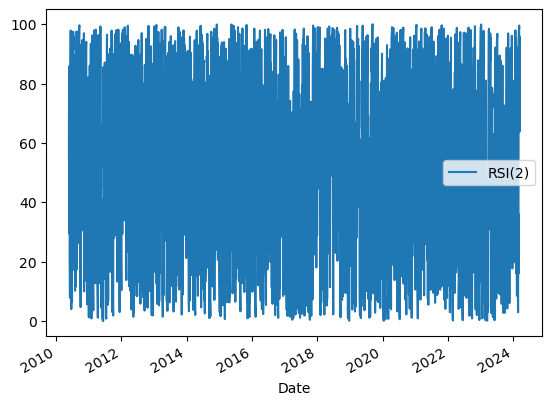

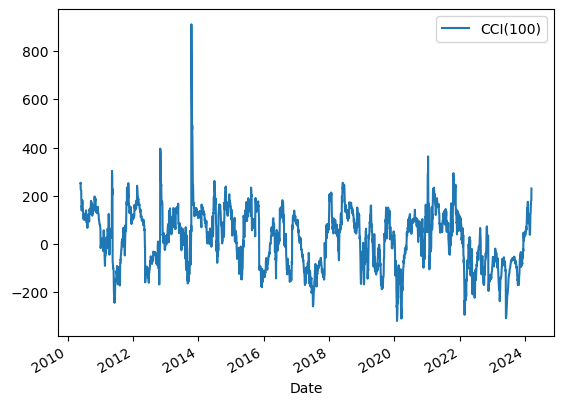

In [2]:
try:
    import pandas_ta as ta
except:
    ! pip install -q pandas_ta
    import pandas_ta as ta

df['RSI(2)'] = ta.rsi(df['Close'], length=2)
df['RSI(7)'] = ta.rsi(df['Close'], length=7)
df['RSI(14)'] = ta.rsi(df['Close'], length=14)
df['CCI(30)'] = ta.cci(close=df['Close'], length=30, high=df['High'], low =df['Low'] )
df['CCI(50)'] = ta.cci(close=df['Close'], length=50, high=df['High'], low =df['Low'] )  
df['CCI(100)'] = ta.cci(close=df['Close'], length=100, high=df['High'], low =df['Low'] )  

# Drop Nan value
df =df.dropna()

# Create a plot showing some of our indicators
df.plot(y='RSI(2)')
df.plot(y='CCI(100)')

df.head()


In [3]:
import numpy as np
df['LABEL'] = np.where( df['Open'].shift(-2).gt(df['Open'].shift(-1 )), '1','0' )
df = df.dropna()

df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI(2),RSI(7),RSI(14),CCI(30),CCI(50),CCI(100),LABEL
Date,,,,,,,,,,,,,
2010-05-26,51.279999,51.279999,50.180000,50.200001,45.122948,2033100,55.037883,73.872266,69.985449,237.519737,229.451986,251.843485,0
2010-05-27,50.880001,51.369999,50.480000,51.330002,46.138668,1106900,79.746976,78.758582,73.227749,213.035010,232.005805,254.008088,1
2010-05-28,50.520000,52.009998,47.790001,51.759998,46.525185,1720500,85.719613,80.386968,74.362668,159.946056,198.526115,226.252203,0
2010-06-01,51.740002,51.740002,50.200001,50.369999,45.275761,2359500,29.491533,62.358268,64.799802,146.281448,194.039145,222.931212,1
2010-06-02,50.410000,51.360001,50.410000,51.349998,46.156631,1549900,63.371114,68.220738,67.931026,136.303802,189.629033,220.495789,0


Creating a Neural Network

In [4]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

# Fitting - Indicators and our Labelling
x = df[df.columns[6:-1]].values
y = df['LABEL'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

mlp = MLPClassifier(hidden_layer_sizes=(8, 8, 8), activation='relu', solver='adam', max_iter=1000)
mlp.fit(x_train, y_train)

predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

print('Train Data Accuracy ')
print(classification_report(y_train, predict_train))

print('Testing Data Accuracy')
print(classification_report(y_test, predict_test))

Train Data Accuracy 
              precision    recall  f1-score   support

           0       0.50      0.48      0.49      1184
           1       0.52      0.54      0.53      1246

    accuracy                           0.51      2430
   macro avg       0.51      0.51      0.51      2430
weighted avg       0.51      0.51      0.51      2430

Testing Data Accuracy
              precision    recall  f1-score   support

           0       0.49      0.47      0.48       528
           1       0.48      0.50      0.49       514

    accuracy                           0.48      1042
   macro avg       0.48      0.48      0.48      1042
weighted avg       0.48      0.48      0.48      1042



Backtesting our model

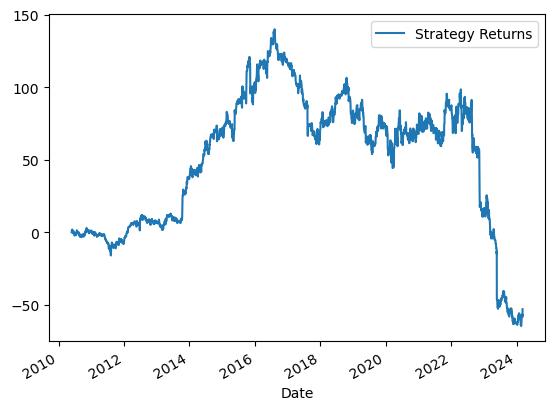

In [5]:
df['Prediction'] = np.append(predict_train, predict_test)
df['Strategy Returns'] = np.where(df['Prediction'].eq('1'), df['Open'].shift(-2) - df['Open'].shift(-1), 0)

df['Strategy Returns'] = df['Strategy Returns'].cumsum()

df.plot(y='Strategy Returns')
plt.show()

In [6]:
prediction = df.iloc[-1]['Prediction']

if prediction == 1:
    print("Today's return forecast: UP")
else:
    print("Today's return forecast: DOWN")

Today's return forecast: DOWN
